In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
zip_file=zipfile.ZipFile('/Users/sandeepmalkanoor/Documents/Projects/Python_Project/orders.zip')
zip_file.extractall('/Users/sandeepmalkanoor/Documents/Projects/Python_Project')
zip_file.close()

In [3]:
df = pd.read_csv("/Users/sandeepmalkanoor/Documents/Projects/Python_Project/orders.csv")

In [4]:
df.head(5)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
# Checking information about the dataframe which column contains how many not null and null values. 
# we can see that ship_mode contains null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [6]:
# Converting column names to lower and replacing space' ' with underscore'_'.

df.columns=df.columns.str.lower().str.replace(' ','_')

In [7]:
# Checking the how many unique value it contains and the count of those unique values.

df['ship_mode'].value_counts(dropna=False)

ship_mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Not Available        4
unknown              1
NaN                  1
Name: count, dtype: int64

In [8]:
# Checking 'null', 'unknown' and 'Not available' values present in how many columns.

for column in df.columns:
    print(f"Number of null values in column '{column}' :")
    print(df[column].isnull().sum())
    print(df[column].eq('Not Available').sum())
    print(df[column].eq('unknown').sum())
    print('\n')

Number of null values in column 'order_id' :
0
0
0


Number of null values in column 'order_date' :
0
0
0


Number of null values in column 'ship_mode' :
1
4
1


Number of null values in column 'segment' :
0
0
0


Number of null values in column 'country' :
0
0
0


Number of null values in column 'city' :
0
0
0


Number of null values in column 'state' :
0
0
0


Number of null values in column 'postal_code' :
0
0
0


Number of null values in column 'region' :
0
0
0


Number of null values in column 'category' :
0
0
0


Number of null values in column 'sub_category' :
0
0
0


Number of null values in column 'product_id' :
0
0
0


Number of null values in column 'cost_price' :
0
0
0


Number of null values in column 'list_price' :
0
0
0


Number of null values in column 'quantity' :
0
0
0


Number of null values in column 'discount_percent' :
0
0
0




In [9]:
# Replacing the 'unknown' and 'Not Available' with the null value.

df['ship_mode'] = df['ship_mode'].replace(['unknown','Not Available'],np.nan)

In [10]:
df['ship_mode'].value_counts(dropna=False)

ship_mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
NaN                  6
Name: count, dtype: int64

# Adding required columns to the dataframe.

In [11]:
# Now we have the list_price and discount_percent columns. 
# using the discount_percent on the list_price we will get the discount_price.
# Lets calculate sales price.

df['discount_price_per_unit']= df['list_price']*(df['discount_percent']/100)

In [12]:
# Now we can get total_discount on quantities sold by using discount_price

df['total_discount_on_quantitiesSold'] = df['discount_price_per_unit']*df['quantity']

In [13]:
# Now we can calculate sales_price per unit and total_sales_price on quantities sold.

df['sales_price']=df['list_price']-df['discount_price_per_unit']
df['total_sales_price']=df['sales_price']*df['quantity']
df['total_cost_price']=df['cost_price']*df['quantity']

In [14]:
# Now we can find the profit per unit and total profit

df['profit_per_unit']=df['sales_price']-df['cost_price']
df['total_profit']=df['total_sales_price']-df['total_cost_price']

In [15]:
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,list_price,quantity,discount_percent,discount_price_per_unit,total_discount_on_quantitiesSold,sales_price,total_sales_price,total_cost_price,profit_per_unit,total_profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,5.2,10.4,254.8,509.6,480,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,21.9,65.7,708.1,2124.3,1800,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,2,5,0.5,1.0,9.5,19.0,20,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,960,5,2,19.2,96.0,940.8,4704.0,3900,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,20,2,5,1.0,2.0,19.0,38.0,40,-1.0,-2.0


In [16]:
df.dtypes

order_id                              int64
order_date                           object
ship_mode                            object
segment                              object
country                              object
city                                 object
state                                object
postal_code                           int64
region                               object
category                             object
sub_category                         object
product_id                           object
cost_price                            int64
list_price                            int64
quantity                              int64
discount_percent                      int64
discount_price_per_unit             float64
total_discount_on_quantitiesSold    float64
sales_price                         float64
total_sales_price                   float64
total_cost_price                      int64
profit_per_unit                     float64
total_profit                    

In [17]:
# converting the datatype of orders date to date format

df['order_date']=pd.to_datetime(df['order_date'],format='%Y-%m-%d')

In [18]:
from sqlalchemy import create_engine

In [19]:
user = 'root'
password = 'Sandeep%40123'
host = 'localhost'  # e.g., 'localhost' or '127.0.0.1'
database = 'demo'

In [20]:
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'


In [21]:
engine = create_engine(connection_string)

In [22]:
df.to_sql('sales_data', con=engine, if_exists='replace', index=False)

9994

# Find top 10 highest revenue generating products

In [23]:
query = """
SELECT product_id, SUM(sales_price) AS sales
FROM sales_data
GROUP BY product_id
ORDER BY sales DESC
LIMIT 10;
"""

In [24]:
df_top_sales = pd.read_sql_query(query, engine)

In [25]:
df_top_sales

,product_id,sales
0,TEC-CO-10004722,59514.0
1,OFF-BI-10003527,26525.3
2,TEC-MA-10002412,21734.4
3,FUR-CH-10002024,21096.2
4,OFF-BI-10001359,19090.2
5,OFF-BI-10000545,18249.0
6,TEC-CO-10001449,18151.2
7,TEC-MA-10001127,17906.4
8,OFF-BI-10004995,17354.8
9,OFF-SU-10000151,16325.8


# Find Top 5 selling products in each region

In [26]:
query="""
select * from(
select region, product_id, sum(sales_price) as sales,
row_number() over(partition by region order by sum(sales_price) desc) as row_num from sales_data
group by region, product_id
) as t1
where row_num<=5 ;
"""


In [27]:
df_top5_products= pd.read_sql_query(query, engine)

In [28]:
df_top5_products

,region,product_id,sales,row_num
0,Central,TEC-CO-10004722,16975.0,1
1,Central,TEC-MA-10000822,13770.0,2
2,Central,OFF-BI-10001120,11056.5,3
3,Central,OFF-BI-10000545,10132.7,4
4,Central,OFF-BI-10004995,8416.1,5
5,East,TEC-CO-10004722,29099.0,1
6,East,TEC-MA-10001047,13767.0,2
7,East,FUR-BO-10004834,11274.1,3
8,East,OFF-BI-10001359,8463.6,4
9,East,TEC-CO-10001449,8316.0,5


# Find month over month growth comparison for 2022 and 2023 sales 


In [29]:
query="""
with monthly_sales as(
select year(order_date) as year, month(order_date) as month, sum(sales_price) as sales
from sales_data
group by year(order_date), month(order_date)
)
select month,
sum(case when year=2022 then sales else 0 end)as sales_2022,
sum(case when year=2023 then sales else 0 end)as sales_2023
from monthly_sales
group by month
order by month
"""

In [30]:
df_monthly_sales=pd.read_sql_query(query, engine)

In [31]:
df_monthly_sales

,month,sales_2022,sales_2023
0,1,94712.5,88632.6
1,2,90091.0,128124.2
2,3,80106.0,82512.3
3,4,95451.6,111568.6
4,5,79448.3,86447.9
5,6,94170.5,68976.5
6,7,78652.2,90563.8
7,8,104808.0,87733.6
8,9,79142.2,76658.6
9,10,118912.7,121061.5


# For each category which month had highest sales

In [32]:
query='''
select * from(
select category, year(order_date)as year, month(order_date)as month, sum(sales_price) as sales,
row_number() over(partition by category order by sum(sales_price) desc) as row_num
from sales_data
group by category, year(order_date), month(order_date)
order by category, sales desc
)as t1
where row_num=1
'''


In [33]:
df_categorySales= pd.read_sql_query(query, engine)

In [34]:
df_categorySales

,category,year,month,sales,row_num
0,Furniture,2022,10,42888.9,1
1,Office Supplies,2023,2,44118.5,1
2,Technology,2023,10,53000.1,1


In [35]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

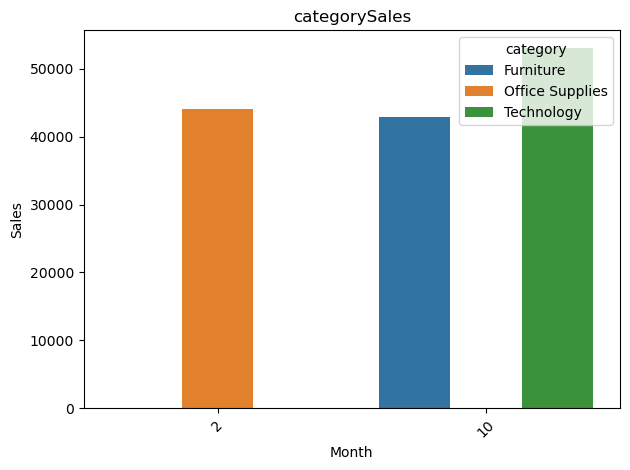

In [42]:
sns.barplot(x='month', y='sales', hue='category', data=df_categorySales)
plt.title('categorySales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# profit comparasion of sub category 2022 vs 2023

In [49]:
query='''
with yearly_profit as(
select sub_category, year(order_date) as year, sum(profit_per_unit) as profit
from sales_data
group by sub_category, year(order_date)
)
select sub_category,
sum(case when year=2022 then profit else 0 end)as 2022_profit,
sum(case when year=2023 then profit else 0 end)as 2023_profit
from yearly_profit
group by sub_category
'''

In [50]:
df_profit=pd.read_sql_query(query, engine)

In [51]:
df_profit

,sub_category,2022_profit,2023_profit
0,Bookcases,5459.5,5036.6
1,Chairs,14725.3,15089.8
2,Labels,349.6,295.3
3,Tables,10315.9,8275.3
4,Storage,8907.4,10630.6
5,Furnishings,4236.2,3342.1
6,Art,924.1,935.7
7,Phones,13024.7,15343.6
8,Binders,8685.5,10523.1
9,Appliances,6374.4,3893.3
